In [1]:
# 모듈 및 데이터 로드 
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [4]:
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [5]:
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [6]:
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [13]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = 0.1).fit(pred_proba_0)
y_pred2 = binarizer.transform(pred_proba_0)

In [14]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion = confusion_matrix(y, y_pred2)
accuracy = accuracy_score(y, y_pred2)
precision = precision_score(y, y_pred2)
recall = recall_score(y, y_pred2)
f1 = f1_score(y, y_pred2)
print(confusion)
print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, f1:{3: .4f}'.format(accuracy, precision, recall, f1))

[[267  90]
 [  6 206]]
정확도 : 0.8313, 정밀도 : 0.6959, 재현율:0.9717, f1: 0.8110


* ROC 곡선 시각화

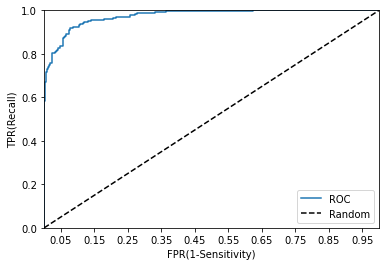

In [24]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
import numpy as np

def roc_curve_plot(y_test,pred_proba):
    fprs, tprs, thresholds =roc_curve(y_test, pred_proba)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y,pred_proba_1)

* ROC AUC 값

In [26]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, y_pred))
print(roc_auc_score(y, y_pred2))

0.9012340785370753
0.8597986364357064
